<a href="https://colab.research.google.com/github/codejawk/GRIP-THE_SPARKS_FOUNDATION/blob/master/GRIP_the_sparks_foundation_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
X=pd.DataFrame(df['Hours'])
y=pd.DataFrame(df['Scores'])

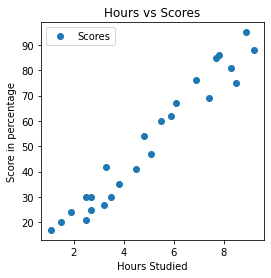

In [ ]:
df.plot(x='Hours', y='Scores', style='o', figsize =(4,4))  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in percentage')  
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1 )

In [ ]:
print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


**Training the Simple Linear Regression model on the Training set**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

#the intercept and the slope of the model will be:-
print("Intercept: ",model.intercept_)
print("slope: ",model.coef_)

Intercept:  [-1.51230612]
slope:  [[10.41075981]]


In [ ]:
#predicting the values of some new data
pred=model.predict(X_test)
xtest_np=np.array(X_test)

print('hours_studied',"--","predicted marks")
for i in range(len(xtest_np)):
  print(xtest_np[i],"     -->",pred[i])

hours_studied -- predicted marks
[1.1]      --> [9.93952968]
[3.3]      --> [32.84320126]
[1.9]      --> [18.26813752]
[8.5]      --> [86.97915227]
[4.8]      --> [48.45934097]
[7.7]      --> [78.65054442]
[6.1]      --> [61.99332873]
[7.4]      --> [75.52731648]


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(pred,y_test)
RMSE=np.sqrt(mean_squared_error(y_test,pred))
print('Mean Absolute error :',MAE.round(2))
print('Root Mean Squared Error :',RMSE.round(2))

Mean Absolute error : 7.17
Root Mean Squared Error : 7.49


**Putting effort to reduce the error!**

In [ ]:
from sklearn.linear_model import Ridge,RidgeCV

alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print('Best Estimate :',ridgecv.alpha_)

Best Estimate : 0.01155064850041579


In [ ]:
model2=Ridge(alpha=0.01155,normalize=True)
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
MAE2=mean_absolute_error(pred2,y_test)
RMSE2=np.sqrt(mean_squared_error(pred2,y_test))
print('Mean Absolute Error in Model 2: ',MAE2.round(2))
print('Root Mean Squared Error in Model 1:',RMSE2.round(2))


Mean Absolute Error in Model 2:  7.01
Root Mean Squared Error in Model 1: 7.3


so we successfully reduce our mae from 7.17 to 7.01 and also rms from 7.49 to 7.3


In [ ]:
#increasing the training size: 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35, random_state=1 ) # test_size increased from 0.3 to 0.35

# testing on model1:
pred=model.predict(X_test)
xtest_np=np.array(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(pred,y_test)
RMSE=np.sqrt(mean_squared_error(y_test,pred))
print('Mean Absolute error :',MAE.round(2))
print('Root Mean Squared Error :',RMSE.round(2))


Mean Absolute error : 6.92
Root Mean Squared Error : 7.25


This certainly proves that the model depends on the training size. BOOM!


**Visualising the results**

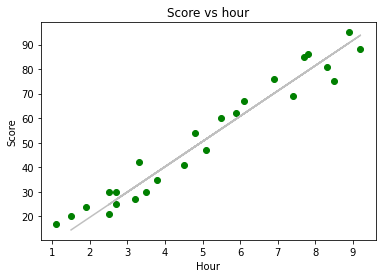

In [ ]:
plt.scatter(X, y, color = 'green')
plt.plot(X_train, model2.predict(X_train), color = 'silver')
plt.title('Score vs hour')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

# Q.What will be predicted score if a student study for 9.25 hrs in a day?



In [ ]:
noh = 9.25
print("Number of hours : ",noh)
print("Predicted score : ",model2.predict(np.array(noh).reshape(1,-1))[0])

Number of hours :  9.25
Predicted score :  [94.27852284]


#                            END OF TASK-2


